#  ML Course Final Project. Movie Success Prediction. 

![HSE_logo](https://www.hse.ru/mirror/pubs/share/522682412)

## Alexey Nepochatov. HSE 2022.
## Description of the final project.

### Overview.
In this project, you will be asked to help a film-producing company. They would like to make sure that films, which they are creating are successful. The company has collected a large dataset, which includes information about more than 80'000 films: their description, genre, budget, rating, etc.

Your task will be to suggest and justify a way to measure the success of the film and build a machine learning model, which is capable of predicting this quantity.

### Detailed Task Description

The solution should have the following parts:

#### [20 %] Formalise the task and suggest the evaluation criterion
* What is your target variable? Why is it a good measure of success and how the film-producing company can use it to make their decision?
* Which task are you going to solve (is it a regression, classification or something else)?
* Which metric will you use to evaluate the performance of the model? Do you have any idea, which values of the metrics can be considered good enough? 


#### [40 %] Explore and preprocess the data 
* Split data into train and test
* Fill missing values (if there are any)
* Remove irrelevant feature (if there are any) and create new ones (explore which features you have, what is their distribution and connection to the target, explain why newly created features are reasonable)
* Properly encode categorical features (if required)


#### [40 %] Train the models and present result of your work
* Use the models introduced during the course, which are relevant for the task you are solving
* You are supposed to compare at least 3 models
* Tune (or explain why there is no need to tune) hyperparameters of each model
* Use cross-validation to compare models and select hyperparameters
* Which model and setup is the best? How does it perform on the test dataset? 

#### General Requirements
* You should provide a solution in the form of the Jupyter Notebook (use the template that we provide)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question / perform required actions from the task
* Support all your statements with calculations and plots. 

For example: If you claim that the dataset does not have missing values, you need to provide code which shows that the total number of missing values is zero.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

This is a template for your final project. 

In [2]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


## Part 1. Task formalization and Evaluation criteria. 

### 1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

I choose **avg_vote** as the target variable, it reflects people's opinion of the movie as a whole and **has no missing data** (we will show it below). We will also set a criterion that the number of **votes** should be more than 100 people in order to get a more objective rating. And also a good indicator of success will be if the movie has **reviews_from_critics** and **reviews_from_users**.


If income variables do not have so many missing data they could be considered as a target as well

In [3]:
full_dataset['target']  = np.where(
    ((full_dataset['avg_vote'] >= 6.7) & (full_dataset['votes'] > 100) &  (full_dataset['reviews_from_users'] > 0)) |
    ((full_dataset['avg_vote'] >= 6.7) & (full_dataset['votes'] > 100) &  (full_dataset['reviews_from_critics'] > 0))
, 1, 0)

target = full_dataset.target


feature_matrix = full_dataset.drop(['avg_vote',
                                    'votes',
                                    'reviews_from_users',
                                    'reviews_from_critics'], axis=1)

### 1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

I will use a **classification**. I chose the **average movie rating** greater than **6.7** as **"successful"** with a combination of votes and reviews, and created the corresponding objective binary **target function** where "1" means **"successful"** and "0" means **"not successful"**. 

### 1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

I will stick to **F1 score**. We often use F1 score when the **classes are imbalanced** and there is a serious downside to predicting false negatives. The **F1 score** can be interpreted as a harmonic mean of the **precision** and **recall**, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

$F1 = 2 * \frac{precision * recall}{precision + recall}$

In [4]:
print("Number of successful movies in data set =", target.sum())
print("Number of not successful movies in data set =", target.shape[0]-target.sum())

Number of successful movies in data set = 18715
Number of not successful movies in data set = 41483


In [5]:
from sklearn.metrics import f1_score

## Part 2. Explore and preprocess the data.

### 2.1 Split data into train and test.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.3, random_state=30)

X_train.drop(['target'], axis=1, inplace=True)
X_test.drop(['target'], axis=1, inplace=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42138, 18) (18060, 18) (42138,) (18060,)


### 2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 

First, let's examine the data in more detail and see what **type of features** we have.

In [7]:
full_dataset.dtypes

imdb_title_id             object
title                     object
original_title            object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
target                     int32
dtype: object

Then let's look how much **data is missing**:

In [8]:
full_dataset.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      5
language                   439
director                    24
writer                     808
production_company        2744
actors                      30
description               1993
avg_vote                     0
votes                        0
budget                   43379
usa_gross_income         48306
worlwide_gross_income    41062
metascore                51386
reviews_from_users        4069
reviews_from_critics      8229
target                       0
dtype: int64

To understand the proportions, let's see how many movies there are in our database.

In [9]:
print("Number of movies in dataset:", full_dataset.shape[0])

Number of movies in dataset: 60198


Now let's see how the different features correlate to each other. Perhaps this will help us discard features that have nothing to do with the target.

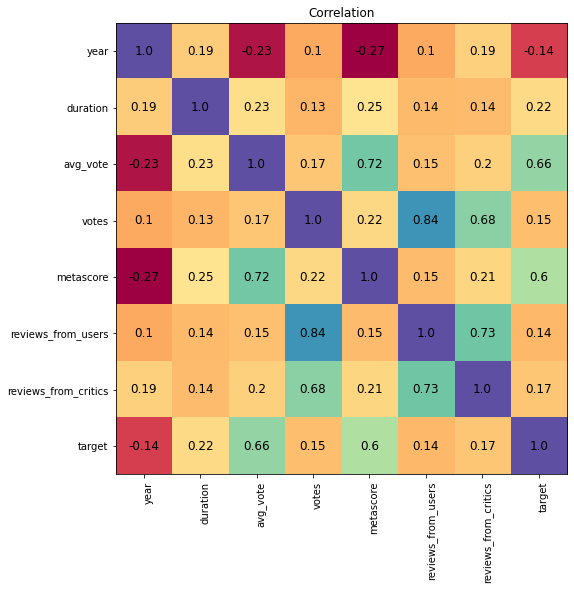

In [10]:
correlation = full_dataset.corr(method='pearson')
columns = correlation.columns.to_list()
n = len(columns)

fig, ax = plt.subplots(figsize=(7,7))
fig.tight_layout()
ax.imshow(correlation, cmap='Spectral')
ax.set_title("Correlation")
ax.grid(visible=None)
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

plt.setp(ax.get_xticklabels(), ha="right", rotation=90, rotation_mode="anchor")

for i in range(n):
    for j in range(n):
        text = ax.text(j, i, round(correlation[columns[i]][columns[j]], 2), ha="center", va="center", color="black", size = 12)

**Budget** might be a good feature to predict success, let's see what it contains

In [11]:
X_train.budget.iloc[33268:59926]

25266            NaN
53555    $ 145000000
33477            NaN
58164            NaN
46914            NaN
            ...     
33268     $ 10000000
44845            NaN
48045    EGP 4000000
4517             NaN
38693            NaN
Name: budget, Length: 8870, dtype: object

After examining the data above, we can now start by doing the following: let's take a closer look at the features that will **have no effect on our model** and which we can safely **drop** and explain why it' true:

* **imdb_title_id** - this is internal information of the site from which the data was obtained, has no relation to the quality of the movie, so we will **drop** this feature.
* **year** - movies for which we are building a predictive model will have a year that is not in the training data, so we will **drop** this feature.
* **budget** - this feature has 43379 missing values, it's means that about **72%** of the whole data of this feature **is missing**. Also, if we look at values that is not NaN, then we will see that the budget is given in different currencies, in order to compare these data, we need to know the exchange rate at the time the film was released. To do this, we need to get data from some financial site, which is outside the scope of this task, in general, the budget would be a good feature for prediction, but due to the two disadvantages described above, we it's better to **drop** this feature. 
* **usa_gross_income** - the same reason as for budget, there are **many missing values** in data - about 80%, so it's better to **dpor** this feature. 
* **worlwide_gross_income** - the same reason as for budget, there are **many missing values** in data - about 68%, so it's better to **drop** this feature. 
* **metascore** - the same reason as for budget, there are **many missing values** in data - about 85%, so it's better to **drop** this feature. 

In [12]:
features_to_drop = ["imdb_title_id",            # meaningless feature 
                    "year",                     # feature "from the future"
                    "budget",                   # too many missing data
                    "usa_gross_income",         # too many missing data
                    "worlwide_gross_income",    # too many missing data
                    "metascore",                # too many missing data
                   ]

X_train.drop(features_to_drop, axis=1, inplace=True)
X_test.drop(features_to_drop, axis=1, inplace=True)

Let's study the movie **title** feature more closely. Let's see how often words are repeated in titles.

In [13]:
from collections import Counter

words_in_title = ' '.join(feature_matrix.title.values.tolist()).lower().split()
counts = Counter(words_in_title)
print("The number of unique words in the movie title =", len(counts))
counts.most_common()[:25]

The number of unique words in the movie title = 49802


[('the', 10429),
 ('of', 3322),
 ('a', 1754),
 ('la', 1648),
 ('in', 1345),
 ('de', 1279),
 ('and', 1026),
 ('to', 955),
 ('no', 879),
 ('le', 729),
 ('i', 702),
 ('man', 553),
 ('el', 519),
 ('-', 512),
 ('love', 468),
 ('les', 462),
 ('on', 437),
 ('di', 429),
 ('for', 419),
 ('&', 414),
 ('il', 411),
 ('die', 402),
 ('my', 375),
 ('der', 369),
 ('night', 365)]

We see that among the total number of films, we have almost 50k unique words in the titles, while the most popular words do not make much sense. So we'll have to **drop** **title** feature.

In [14]:
X_train.drop(["title"], axis=1, inplace=True)
X_test.drop(["title"], axis=1, inplace=True)

Although it is obvious that the **original title** can be dropped for the same reason as the **title**, we will check it again

In [15]:
words_in_original_title = ' '.join(feature_matrix.original_title.values.tolist()).lower().split()
counts = Counter(words_in_original_title)
print("The number of unique words in the original movie title =", len(counts))

The number of unique words in the original movie title = 49876


So there are too many unique words in **original title**, so it's better to **drop** this feature. 

In [16]:
X_train.drop(["original_title"], axis=1, inplace=True)
X_test.drop(["original_title"], axis=1, inplace=True)

Now let's study the feature **description**.

In [17]:
words_in_description = str(feature_matrix.description.values.tolist()).lower().split()
counts = Counter(words_in_description)
print("The number of unique words in the movie title =", len(counts))
counts.most_common()[30:40]

The number of unique words in the movie title = 121740


[('man', 4447),
 ('after', 4183),
 ('one', 4180),
 ('...",', 4137),
 ('into', 3906),
 ('up', 3867),
 ("'the", 3809),
 ('life', 3648),
 ('out', 3553),
 ('him', 3509)]

So there are too many unique words in **description** and the most repeated words do not make sense, like prepositions, so it's better to **drop** this feature. In general, using a more complex approach, it is possible to do something like a bag of words for successful films and see if there are such words in the description of the film for which we want to make a prediction.

In [18]:
X_train.drop(["description"], axis=1, inplace=True)
X_test.drop(["description"], axis=1, inplace=True)

Consider the feature **director**. Let's see how many unique and features we have.

In [19]:
print(feature_matrix.director.nunique())

22771


And how many data is missing.

In [20]:
feature_matrix.director.isna().sum()

24

In [21]:
X_train.director.fillna('Unknown', inplace=True)
X_test.director.fillna('Unknown', inplace=True)
X_train.director.isna().sum(), X_test.director.isna().sum()

(0, 0)

In [22]:
from collections import Counter

words_in_director = feature_matrix.director.values.tolist()
counts = Counter(words_in_director)
print("The number of unique words in the movie title =", len(counts))
most_popular_dirctors = list(x[0] for x in counts.most_common(30))
counts.most_common(30)

The number of unique words in the movie title = 22772


[('Michael Curtiz', 86),
 ('Jesús Franco', 85),
 ('Lloyd Bacon', 73),
 ('William Beaudine', 69),
 ('John Ford', 67),
 ('Richard Thorpe', 67),
 ('Lesley Selander', 65),
 ('Gordon Douglas', 64),
 ('Mervyn LeRoy', 60),
 ('Raoul Walsh', 58),
 ('Norman Taurog', 57),
 ('Cheh Chang', 56),
 ('Giannis Dalianidis', 55),
 ('Alfred Hitchcock', 53),
 ('Claude Chabrol', 53),
 ('Henry Hathaway', 52),
 ('William A. Wellman', 51),
 ('Alfred E. Green', 50),
 ('Ray Enright', 49),
 ('George Marshall', 49),
 ('Joseph Kane', 49),
 ('Priyadarshan', 49),
 ('William A. Seiter', 47),
 ('Roy Del Ruth', 47),
 ('Frank Borzage', 46),
 ('Allan Dwan', 45),
 ('David Butler', 45),
 ('Takashi Miike', 45),
 ('William Dieterle', 44),
 ('Lew Landers', 44)]

We will assume that directors who have made many films make more successful films.

In [23]:
X_train['popular_dirctor'] = np.where(np.isin(X_train['director'],most_popular_dirctors), 1, 0)
X_test['popular_dirctor'] = np.where(np.isin(X_test['director'],most_popular_dirctors), 1, 0)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

X_train.drop(["director"], axis=1, inplace=True)
X_test.drop(["director"], axis=1, inplace=True)

Consider **writers** feature and look how much data is missing

In [24]:
feature_matrix.writer.isna().sum()

808

Not a lot of missing data, but let's see how many films have the **same writers**

In [25]:
from collections import Counter

words_in_writer = feature_matrix.writer.values.tolist()
counts = Counter(words_in_writer)
print("The number of unique words in the movie title =", len(counts))
counts.most_common(10)

The number of unique words in the movie title = 47547


[(nan, 808),
 ('Jing Wong', 70),
 ('Kuang Ni', 44),
 ('Woody Allen', 33),
 ('Leonardo Benvenuti, Piero De Bernardi', 32),
 ('Cheh Chang, Kuang Ni', 32),
 ('Giannis Dalianidis', 28),
 ('Ingmar Bergman', 25),
 ('Agenore Incrocci, Furio Scarpelli', 24),
 ('Franco Castellano, Giuseppe Moccia', 23)]

We see that there are very few intersections, it would be better to **drop** this feature.

In [26]:
X_train.drop(["writer"], axis=1, inplace=True)
X_test.drop(["writer"], axis=1, inplace=True)

**Actors** feature.

In [27]:
feature_matrix.actors.isna().sum()

30

In [28]:
X_train.actors.fillna('Unknown', inplace=True)
X_test.actors.fillna('Unknown', inplace=True)

In [29]:
feature_matrix.actors.values
all_actors = ' '.join(str(x) for x in feature_matrix.actors.values).split(", ")

In [30]:
len(all_actors)

758131

There are a lot of data in actors, let's consider only 500 the most filmed actors. We will assume that they are often filmed because films with them are more successful.

In [31]:
from collections import Counter

words_in_actors = all_actors
counts = Counter(words_in_actors)
most_popular_actors = list(x[0] for x in counts.most_common(500))
counts.most_common(10)

[('Brahmanandam', 193),
 ('Anupam Kher', 160),
 ('John Carradine', 136),
 ("Henry O'Neill", 135),
 ('Gulshan Grover', 131),
 ('Paresh Rawal', 120),
 ('Amrish Puri', 119),
 ('Shakti Kapoor', 117),
 ('Jagathi Sreekumar', 112),
 ('Keenan Wynn', 111)]

Since in feature actors we have a list of actors, then using regular expressions we will transform the list of the most popular actors, so that later we can use it to search for films where they starred

In [32]:
most_popular_actors = '|'.join(most_popular_actors)
# most_popular_actors

In [33]:
import re

X_train["popular_actor"] = np.where((X_train.actors.str.contains(most_popular_actors, regex=True)), 1, 0)
X_test["popular_actor"] = np.where((X_test.actors.str.contains(most_popular_actors, regex=True)), 1, 0)

In [34]:
features_to_drop = ["actors"]

X_train.drop(["actors"], axis=1, inplace=True)
X_test.drop(["actors"], axis=1, inplace=True)

**date_published** - the same reason as for the year, movies for which we are building a predictive model will have date_published that is not in the training data, so we will **drop** this feature, but we can take into account the month in which the movie was released, so instead of this feature, we will add the **month_published**.

In [35]:
X_train["month_published"] = pd.to_datetime(X_train.date_published).dt.month

In [36]:
X_test["month_published"] = pd.to_datetime(X_test.date_published).dt.month

In [37]:
X_train.drop(["date_published"], axis=1, inplace=True)
X_test.drop(["date_published"], axis=1, inplace=True)

Now consider the **country** feature. Let's see how much data have missed

In [38]:
X_train.country.isna().sum()

4

In [39]:
X_test.country.isna().sum()

1

There isn't much data missing, so we'll set **country** to **Unknown**

In [40]:
X_train.country.fillna('Unknown', inplace=True)
X_test.country.fillna('Unknown', inplace=True)

X_train = pd.concat([X_train, X_train.country.str.get_dummies(sep=', ').add_prefix('country_')], axis = 1)
X_test = pd.concat([X_test, X_test.country.str.get_dummies(sep=', ').add_prefix('country_')], axis = 1)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

In [41]:
X_train.drop(["country"], axis=1, inplace=True)
X_test.drop(["country"], axis=1, inplace=True)

In [42]:
X_train.shape, X_test.shape

((42138, 177), (18060, 177))

Let's explore the **languege** feature and see how much data have missed

In [43]:
X_train.language.isna().sum()

317

In [44]:
X_test.language.isna().sum()

122

Quite a lot, since most of the films are in English, then we assume that the language of these films is also **English**

In [45]:
X_train.language.fillna('English', inplace=True)
X_test.language.fillna('English', inplace=True)

X_train = pd.concat([X_train, X_train.language.str.get_dummies(sep=', ').add_prefix('language_')], axis = 1)
X_test = pd.concat([X_test, X_test.language.str.get_dummies(sep=', ').add_prefix('language_')], axis = 1)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

In [46]:
X_train.drop(["language"], axis=1, inplace=True)
X_test.drop(["language"], axis=1, inplace=True)

In [47]:
X_train.shape, X_test.shape

((42138, 414), (18060, 414))

Let's consider **production_company**. Find how much data is missing and replace the missing data with **Others**.

In [48]:
X_train.production_company.isna().sum()

1891

In [49]:
X_test.production_company.isna().sum()

853

In [50]:
X_train.production_company.fillna('Other', inplace=True)
X_test.production_company.fillna('Other', inplace=True)

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer

vector_mlb = MultiLabelBinarizer(sparse_output=True)

X_train.production_company = X_train.production_company.str.split(', ')
X_test.production_company = X_test.production_company.str.split(', ')

In [52]:
X_train = X_train.merge(pd.DataFrame.sparse.from_spmatrix(vector_mlb.fit_transform(X_train.production_company), 
                                                          X_train.index, 'production_company_' + vector_mlb.classes_), 
                        left_index=True, 
                        right_index=True)
X_test = X_test.merge(pd.DataFrame.sparse.from_spmatrix(vector_mlb.transform(X_test.production_company), 
                                                        X_test.index, 'production_company_' + vector_mlb.classes_),
                      left_index=True, 
                      right_index=True)

In [53]:
X_train.drop(["production_company"], axis=1, inplace=True)
X_test.drop(["production_company"], axis=1, inplace=True)

In [54]:
X_train.shape, X_test.shape

((42138, 17047), (18060, 17047))

There is no missing data in **genre** feature, so we just encode it.

In [55]:
X_train = pd.concat([X_train, X_train.genre.str.get_dummies(sep=', ').add_prefix('genre_')], axis = 1)
X_test = pd.concat([X_test, X_test.genre.str.get_dummies(sep=', ').add_prefix('genre_')], axis = 1)

X_test[X_train.columns.difference(X_test.columns)] = 0
X_train[X_test.columns.difference(X_train.columns)] = 0

In [56]:
X_train.drop(["genre"], axis=1, inplace=True)
X_test.drop(["genre"], axis=1, inplace=True)

In [57]:
X_train.shape, X_test.shape

((42138, 17070), (18060, 17070))

We got a lot of features, so we will **drop** those that almost no one has, that is, we can say that they are unique.

In [58]:
unique = 1 - X_train.astype(bool).sum(axis=0) / X_train.shape[0]
unique = unique[unique > 0.995]

In [59]:
X_train.drop(unique.index, axis=1, inplace=True)
X_test.drop(unique.index, axis=1, inplace=True)

In [60]:
X_train.shape, X_test.shape

((42138, 97), (18060, 97))

In [61]:
X_train.columns.difference(X_test.columns)

Index([], dtype='object')

In [62]:
# for i in X_test:
#     print(i)

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

num_col = ['duration', 
           'month_published']

num_pipe = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    StandardScaler())

column_transformer = ColumnTransformer([('num', num_pipe, num_col),], remainder='passthrough')

In [64]:
X_train.head()

,duration,popular_dirctor,popular_actor,month_published,country_Argentina,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Canada,...,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
25681,88,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51975,141,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6287,91,0,1,12,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12215,105,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21391,123,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Part 3. Train and compare the models

### 3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

#### Random Forest Classifier model

In [66]:
# Random Forest Classifier model

Random_Forest_pipe = Pipeline([('column_transformer', column_transformer), 
                               ('estimator', RandomForestClassifier())])


Random_Forest_param_grid = {'estimator': [RandomForestClassifier()],
                            'estimator__criterion':  ["gini", "entropy", "log_loss"], 
                            'estimator__n_estimators': [100, 500, 700], # testes for 100, 500, 1000
                            'estimator__max_depth': [5, 10, 15],  # testes for 5, 10, 15 
                            'estimator__min_samples_leaf': [9]
                           }

For Random Forest Classifier we will try to tune these hyperparameters:
* criterion - The function to measure the quality of a split
* n_estimators - The number of trees in the forest.
* max_depth - The maximum depth of the tree
* min_samples_leaf - The minimum number of samples required to be at a leaf node.

#### Gradient Boosting Classifier model

In [67]:
# Gradient Boosting Classifier model

GradientBoosting_pipe = Pipeline([('column_transformer', column_transformer), 
                          ('estimator', GradientBoostingClassifier())])

GradientBoosting_param_grid = [{'estimator': [GradientBoostingClassifier()],
                                'estimator__criterion': ['friedman_mse', 'squared_error'],
                                'estimator__learning_rate': [1.7],  # tested for 0.1, 0.5, 0.75, 1.2, 1.5, 1.6
                                'estimator__loss': ['exponential'], # tested for log_loss, exponential
                                'estimator__n_estimators': [500], # tested for 100, 200, 300, 500, 600,  1000
                                'estimator__max_depth': [4],   # tested for 3, 5, 6, 7, 9
                                'estimator__min_samples_leaf': [12] # tested for 3, 9, 10, 11, 12, 15
                               },]

Since the computation time is quite long, we will focus on **tuning** the model that gives the best results. In our case, the best model is Gradient Boosting Classifier, we will try to tune these hyperparameters:
* criterion - The function to measure the quality of a split
* learning_rate - Learning rate shrinks the contribution of each tree by learning_rate
* loss - The loss function to be optimized.
* n_estimators - The number of trees in the forest.
* max_depth - The maximum depth of the tree.
* min_samples_leaf - The minimum number of samples required to be at a leaf node. 

#### Decision Tree Classifier model

In [68]:
# Decision Tree Classifier

DecisionTreeClassifier_pipe = Pipeline([('column_transformer', column_transformer), 
                                        ('estimator', DecisionTreeClassifier())])

DecisionTreeClassifier_param_grid = {'estimator': [DecisionTreeClassifier()],
                                     'estimator__max_depth': [3, 5, 6, 9, 12],
                                     'estimator__criterion': ['gini', 'entropy', 'log_loss'],
                                     'estimator__min_samples_leaf': [3, 6, 9, 16, 24, 48]
                           }

For Decision Tree Classifier we will try to tune these hyperparameters:
* max_depth - The maximum depth of the tree
* criterion - The function to measure the quality of a split
* min_samples_leaf - The minimum number of samples required to be at a leaf node

#### Logistic Regression model

In [69]:
LogisticRegression_pipe = Pipeline([('column_transformer', column_transformer), 
                                    ('estimator', LogisticRegression(n_jobs=-1))])

LogisticRegression_param_grid = {'estimator__penalty': ['none', 'l2', 'elasticnet'], 
                                 'estimator__C': [0.01, 0.1, 0.5, 1, 5, 10, 15, 20],
                                 'estimator__solver' : ['newton-cg', 'sag', 'saga',  'lbfgs']}

Logical regression does not have many parameters, so we will try to tune these hyperparameters:
* penalty - Specify the norm of the penalty
* C - Inverse of regularization strength
* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
‘liblinear’ is limited to one-versus-rest schemes.

### 3.2 Use cross-validation to compare models and select best set of hyperparameters

In [70]:
Random_Forest_cv = GridSearchCV(Random_Forest_pipe, 
                                param_grid=Random_Forest_param_grid, 
                                scoring='f1', 
                                cv=5, 
                                n_jobs=-1)

Random_Forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['duration',
                                                                          'month_published'])])),
                                       ('estimator',
                                        RandomForestClassifie

In [71]:
print('Best score for Random Forest: ', Random_Forest_cv.best_score_)
print(Random_Forest_cv.best_estimator_)

Best score for Random Forest:  0.377606419968589
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration',
                                                   'month_published'])])),
                ('estimator',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=9,
                                        n_estimators=500))])


In [94]:
y_pred_Random_Forest_train = Random_Forest_cv.best_estimator_.predict(X_train)

In [95]:
print("f1_score for Random Forest for train data", f1_score(y_train, y_pred_Random_Forest_train).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Random Forest for train data 0.4107

****************************************************************************************************************


In [72]:
y_pred_Random_Forest = Random_Forest_cv.best_estimator_.predict(X_test)

In [73]:
print("f1_score for Random Forest", f1_score(y_test, y_pred_Random_Forest).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Random Forest 0.3855

****************************************************************************************************************


In [74]:
GradientBoosting_cv = GridSearchCV(GradientBoosting_pipe,
                                   param_grid=GradientBoosting_param_grid, 
                                   scoring='f1', 
                                   cv=5, 
                                   n_jobs=-1)

GradientBoosting_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['duration',
                                                                          'month_published'])])),
                                       ('estimator',
                                        GradientBoostingClass

In [75]:
print('Bests score for Gradient Boosting: ', GradientBoosting_cv.best_score_)
print(GradientBoosting_cv.best_estimator_)

Bests score for Gradient Boosting:  0.4786494573851421
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration',
                                                   'month_published'])])),
                ('estimator',
                 GradientBoostingClassifier(learning_rate=1.7,
                                            loss='exponential', max_depth=4,
                                            min_samples_leaf=12,
                                            n_esti

In [92]:
y_pred_Gradient_Boosting_train = GradientBoosting_cv.best_estimator_.predict(X_train)

In [93]:
print("f1_score for Gradient Boosting for train data", f1_score(y_train, y_pred_Gradient_Boosting_train).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Gradient Boosting for train data 0.6908

****************************************************************************************************************


In [76]:
y_pred_Gradient_Boosting = GradientBoosting_cv.best_estimator_.predict(X_test)

In [77]:
print("f1_score for Gradient Boosting", f1_score(y_test, y_pred_Gradient_Boosting).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Gradient Boosting 0.4824

****************************************************************************************************************


In [78]:
DecisionTreeClassifier_cv = GridSearchCV(DecisionTreeClassifier_pipe,
                                         param_grid=DecisionTreeClassifier_param_grid, 
                                         scoring='f1',                                
                                         cv=5, 
                                         n_jobs=-1)

DecisionTreeClassifier_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['duration',
                                                                          'month_published'])])),
                                       ('estimator',
                                        DecisionTreeClassifie

In [79]:
print('Bests score for Decision Tree: ', DecisionTreeClassifier_cv.best_score_)
print(DecisionTreeClassifier_cv.best_estimator_)

Bests score for Decision Tree:  0.45412433910082883
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration',
                                                   'month_published'])])),
                ('estimator',
                 DecisionTreeClassifier(max_depth=12, min_samples_leaf=24))])


In [90]:
y_pred_Decision_Tree_train =  DecisionTreeClassifier_cv.best_estimator_.predict(X_train)

In [91]:
print("f1_score for Decision Tree for train data", f1_score(y_train, y_pred_Decision_Tree_train).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Decision Tree for train data 0.4814

****************************************************************************************************************


In [80]:
y_pred_Decision_Tree =  DecisionTreeClassifier_cv.best_estimator_.predict(X_test)

In [81]:
print("f1_score for Decision Tree", f1_score(y_test, y_pred_Decision_Tree).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Decision Tree 0.4385

****************************************************************************************************************


In [82]:
LogisticRegression_cv = GridSearchCV(LogisticRegression_pipe, 
                                     param_grid=LogisticRegression_param_grid, 
                                     scoring='f1', 
                                     cv=5,
                                     n_jobs=-1)

LogisticRegression_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['duration',
                                                                          'month_published'])])),
                                       ('estimator',
                                        LogisticRegression(n_

In [83]:
print('Bests score for Decision Tree: ', LogisticRegression_cv.best_score_)
print(LogisticRegression_cv.best_estimator_)

Bests score for Decision Tree:  0.4357338289170241
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration',
                                                   'month_published'])])),
                ('estimator',
                 LogisticRegression(C=5, n_jobs=-1, solver='newton-cg'))])


In [86]:
y_pred_LogisticRegression_train =  LogisticRegression_cv.best_estimator_.predict(X_train)

In [89]:
print("f1_score for Logistic Regression for train data", f1_score(y_train, y_pred_LogisticRegression_train).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Logistic Regression for train data 0.4358

****************************************************************************************************************


In [84]:
y_pred_LogisticRegression =  LogisticRegression_cv.best_estimator_.predict(X_test)

In [85]:
print("f1_score for Logistic Regression", f1_score(y_test, y_pred_LogisticRegression).round(4), end="\n\n")
print("****************************************************************************************************************")

f1_score for Logistic Regression 0.426

****************************************************************************************************************


### 3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

F1 score ranges from 0 to 1, where 0 is the worst possible score and 1 is a perfect score indicating that the model predicts each observation correctly.

We have evaluated **four** models using f1 score to to find out how they **perform on the test dataset**:
* Gradient Boosting f1 ≈ 0.48
* Decision Tree f1 ≈ 0.44
* Logistic Regression f1 ≈ 0.43
* Random Forest f1 ≈ 0.38

In our case, we got the best result for **F1 score ≈ 0.48** when using the **Gradient Boosting** model. We use 97 variables for the predictors. Among them are mainly categorical features that we had to encode using Dummy Encoding. We encoded several features using target coding, for example, we looked at whether a popular director was making a film.

We had to **drop some features** from the dataset, as they were either not relevant, or they had a lot of missing data.

We compared four different models, and moreover, for each model, we selected the hyperparameters that allow us to obtain the best results.

We split the dataset into training and test samples to train and validation of the models. We used a cross-validation approach to tune the hyperparameters of the models.

We are not able to make a prediction for absolutely any movie, because our data is not enough, a larger sample is required.

For the client, I would say that we are able to predict the success of a film based on data that is quite easy to obtain, and that by developing the model further, we can improve the quality of the prediction by adding more data, taking into account more features, and that work on this model will reduce costs, as they can cancel the shooting of films that will be unsuccessful.